In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split

In [20]:
def regParameters(X_train, X_test , y_train, y_test):
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)

    y_pred=reg.predict(X_test)
    
    residual=y_test-y_pred
    MRE=sum((abs(residual)/y_test))
    MMRE=MRE/len(y_test)
    SQResidual=residual*residual
    SSE=sum(SQResidual)
    MSE=SSE/len(y_pred)
    RMSE=np.sqrt(MSE)
    MAE=sum(abs(residual))/len(y_pred)
    
    p = X_test.shape[1]
    n = len(y_test)
    
    r_squared = metrics.r2_score(y_test, y_pred)
    adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    
    return {
        'R^2 score': r_squared,
        'Adjusted R^2 score': adj_r_squared,
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE,
        'MMRE': MMRE,
    }

In [21]:
def selectFeatures(dataset):
    data = pd.read_csv("../dataset/" + dataset)  
    
    X = data
    X = data.drop(columns=['change'])
    y = data['change']
    
    pca = PCA()
    principalComponents = pca.fit_transform(X)
    
    abs_components = abs(pca.components_)
    
    top_4_original_feature_indices = abs_components.argsort(axis=1)[:, ::-1][:, :4]
    
    top_4_original_feature_names = []
    
    for i in range(top_4_original_feature_indices.shape[0]):
        top_4_original_feature_names.append([X.columns[j] for j in top_4_original_feature_indices[i]])

    explained_variance_ratio = pca.explained_variance_ratio_

    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.title(f'Explained Variance Ratio by Principal Component (Dataset: {dataset})' )
    plt.show()
    
    print("Top 4 original features after PCA of dataset:")
    print(top_4_original_feature_names[0])

    X_filtered = X[top_4_original_feature_names[0]]
    X_train, X_test , y_train, y_test = train_test_split(X_filtered, y,test_size=0.3,random_state=1)
    print(regParameters(X_train, X_test , y_train, y_test))

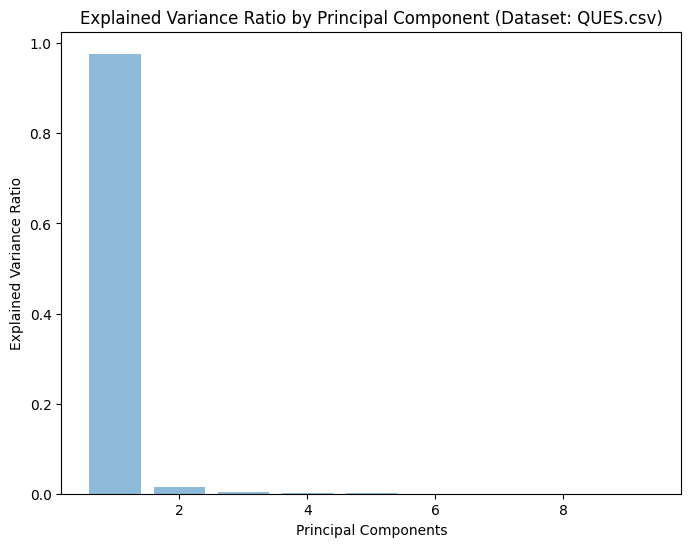

Top 4 original features after PCA of dataset:
['size1', 'rfc', 'wmc', 'size2']
{'R^2 score': 0.537665378995404, 'Adjusted R^2 score': 0.4288807622884403, 'MAE': 16.468353589134363, 'MSE': 592.3738750567007, 'RMSE': 24.338731993608473, 'MMRE': 0.3207739364075561}


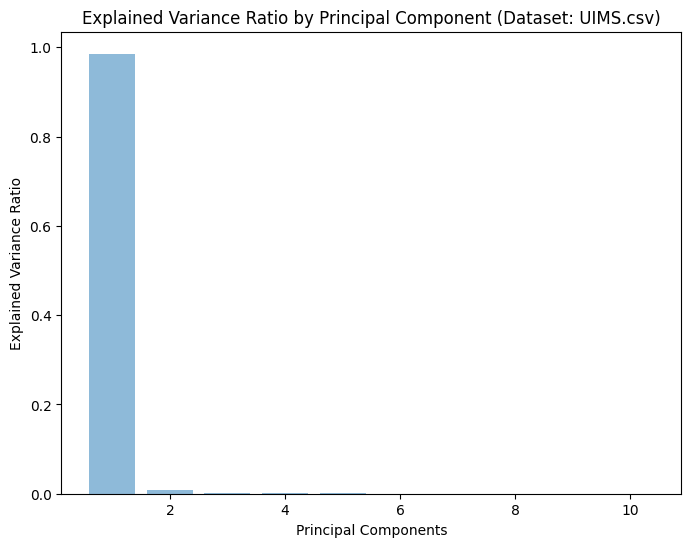

Top 4 original features after PCA of dataset:
['size1', 'rfc', 'wmc', 'size2']
{'R^2 score': 0.14220203578502844, 'Adjusted R^2 score': -0.34796822948066963, 'MAE': 53.50984400310781, 'MSE': 8681.838722053102, 'RMSE': 93.17638500206532, 'MMRE': 3.6784954935950083}


In [22]:
datasets = ['QUES.csv', 'UIMS.csv']

for dataset in datasets:
    selectFeatures(dataset)